## Challenge Set 1

### Topic:         Benson/MTA data
### Date:           4/13/2016
### Name:         Anne Nguyen

In [62]:
%matplotlib inline
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = 16, 12 

### Challenge 1, 2

In [63]:
import csv
from collections import defaultdict
import dateutil.parser
import urllib
import contextlib

turnstile_dict = defaultdict(list)
time_dict = defaultdict(list)

url = 'http://web.mta.info/developers/data/nyct/turnstile/turnstile_160402.txt'

with contextlib.closing(urllib.urlopen(url)) as f:
    reader = csv.reader(f)
    reader.next()
    for row in reader:
        ca = row[0]
        unit = row[1]
        scp = row[2]
        station = row[3]
        linename = row[4]
        division = row[5]
        date = row[6]
        time = row[7]
        desc = row[8]
        entries = row[9].lstrip('0')
        exits = row[10].strip().lstrip('0')

        numentries = int(entries) if entries else 0
        datestring = date + " " + time
        datetime = dateutil.parser.parse(datestring)

        turnstile_dict[(ca, unit, scp, station)].append(
            [linename, division, date, time, desc, entries, exits])

        time_dict[(ca, unit, scp, station)].append([datetime, numentries])

error: [Errno 104] Connection reset by peer

In [ ]:
turnstile_dict.popitem() #challenge 1


    (('PTH08', 'R540', '00-01-06', 'PATH WTC'),
     [['1', 'PTH', '03/26/2016', '03:23:04', 'REGULAR', '548824', '0000269244'],
      ['1', 'PTH', '03/26/2016', '07:35:04', 'REGULAR', '548827', '0000269245'],
      ['1', 'PTH', '03/26/2016', '11:47:04', 'REGULAR', '548845', '0000269250'],
      ['1', 'PTH', '03/26/2016', '15:59:04', 'REGULAR', '548906', '0000269252'],
      ['1', 'PTH', '03/26/2016', '20:11:04', 'REGULAR', '549013', '0000269253'],
      ['1', 'PTH', '03/27/2016', '00:23:04', 'REGULAR', '549060', '0000269253'],
      ['1', 'PTH', '03/27/2016', '04:35:04', 'REGULAR', '549073', '0000269254'],
      ...
      ['1', 'PTH', '03/31/2016', '13:49:04', 'REGULAR', '551531', '0000269559'],
      ['1', 'PTH', '03/31/2016', '18:01:04', 'REGULAR', '551848', '0000269565'],
      ['1', 'PTH', '03/31/2016', '22:13:04', 'REGULAR', '552114', '0000269570'],
      ['1', 'PTH', '04/01/2016', '02:25:04', 'REGULAR', '552121', '0000269570'],
      ['1', 'PTH', '04/01/2016', '06:37:04', 'REGULAR', '552121', '0000269570'],
      ['1', 'PTH', '04/01/2016', '10:49:04', 'REGULAR', '552159', '0000269618'],
      ['1', 'PTH', '04/01/2016', '15:01:04', 'REGULAR', '552189', '0000269621'],
      ['1', 'PTH', '04/01/2016', '19:13:04', 'REGULAR', '552596', '0000269630'],
      ['1', 'PTH', '04/01/2016', '23:25:04', 'REGULAR', '552655', '0000269633']])


In [ ]:
time_dict.popitem() #challenge 2

    (('N134', 'R385', '00-00-00', 'ROCKAWAY BLVD'),
     [[datetime.datetime(2016, 3, 26, 1, 0), 7238654],
      [datetime.datetime(2016, 3, 26, 5, 0), 7238667],
      [datetime.datetime(2016, 3, 26, 9, 0), 7238807],
      [datetime.datetime(2016, 3, 26, 13, 0), 7238996],
      [datetime.datetime(2016, 3, 26, 17, 0), 7239204],
      [datetime.datetime(2016, 3, 26, 21, 0), 7239378],
      ...
      [datetime.datetime(2016, 4, 1, 9, 0), 7246721],
      [datetime.datetime(2016, 4, 1, 13, 0), 7247001],
      [datetime.datetime(2016, 4, 1, 17, 0), 7247262],
      [datetime.datetime(2016, 4, 1, 21, 0), 7247471]])

### Challenge 3

In [ ]:
count_dict = defaultdict(list)

for turnstile, entries in time_dict.items():
    entries.sort(key = lambda x: x[0])
    for i in range(1,len(entries)):
        count_dict[turnstile].append([entries[i][0], entries[i][1] - entries[i-1][1]])

daily_dict = defaultdict(list)

for turnstile, entries in count_dict.items():
    each_day = {}
    for dt, count in entries:
        day = dt.date()
        each_day[day] = each_day.get(day,0) + count
    daily_dict[turnstile] = sorted(each_day.items())

In [ ]:
daily_dict.popitem()

    (('R190', 'R038', '00-00-02', '215 ST'),
     [(datetime.date(2016, 3, 26), 378),
      (datetime.date(2016, 3, 27), 325),
      (datetime.date(2016, 3, 28), 643),
      (datetime.date(2016, 3, 29), 808),
      (datetime.date(2016, 3, 30), 685),
      (datetime.date(2016, 3, 31), 697),
      (datetime.date(2016, 4, 1), 657)])

### Challenge 4

In [ ]:
single_turnstile = daily_dict.popitem()
turnstile, entries = single_turnstile
dates, counts = zip(*entries)

In [ ]:
plt.plot(dates,counts)
plt.title(str(single_turnstile[0]))
plt.xlabel('dates')
plt.ylabel('entries')

### Challenge 5 (switched to pandas)

In [ ]:
import csv
import urllib
import pandas as pd
import datetime

url = 'http://web.mta.info/developers/data/nyct/turnstile/turnstile_160402.txt'

week = pd.read_csv(url, usecols=[0,1,2,3,4,6,7,9])

In [ ]:
control = week.groupby(['C/A', 'STATION', 'LINENAME', 'DATE','TIME'])

In [ ]:
ca_interval_totals = pd.DataFrame(control.sum())

In [ ]:
running_diff = pd.DataFrame(ca_interval_totals.diff().fillna(0))

In [ ]:
ca_totals = pd.DataFrame(running_diff.reset_index().groupby(['C/A','STATION','LINENAME','DATE']).sum()).astype(int)

In [ ]:
ca_totals.reset_index().head() #daily counts per turnstile


    C/A	STATION	LINENAME	DATE	ENTRIES
    0	A002	59 ST	NQR456	03/26/2016	1664
    1	A002	59 ST	NQR456	03/27/2016	1740
    2	A002	59 ST	NQR456	03/28/2016	12991
    3	A002	59 ST	NQR456	03/29/2016	16493
    4	A002	59 ST	NQR456	03/30/2016	16662

### Challenge 6

In [ ]:
stations = ca_totals.reset_index().groupby(['STATION','LINENAME','DATE'])

In [ ]:
stations_total = stations.sum()

In [ ]:
stations_total.reset_index().head() #daily station entries

    STATION	LINENAME	DATE	ENTRIES
    1 AV	L	03/26/2016	1103516315
                03/27/2016	15446
                03/28/2016	22046
                03/29/2016	24190
                03/30/2016	24818

In [ ]:
stations_total = stations_total[stations_total.ENTRIES > 0] #drop negatives

In [ ]:
stations_total = stations_total[stations_total.ENTRIES < 200000] #drop outliers

In [ ]:
stations_total = stations_total.reset_index()

### Challenge 7

In [ ]:
station1 = stations_total[stations_total.STATION == '1 AV']

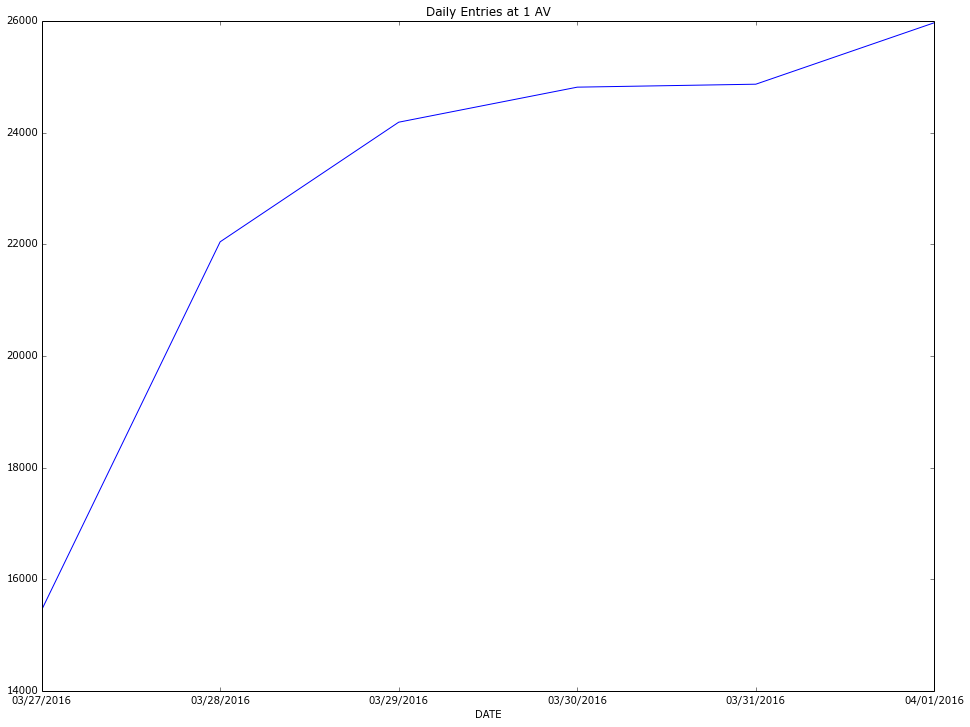

In [64]:
station1.plot(x='DATE', y = "ENTRIES", kind = 'line', legend = None, title = "Daily Entries at 1 AV")

In [26]:
#unfortunately all data from 3/26/16 for every station was dropped as all readings were an order of magnitude too high,
#so my week only has six days!

### Challenge 8

In [89]:
url = 'http://web.mta.info/developers/data/nyct/turnstile/turnstile_160416.txt'

anotherweek = pd.read_csv(url, usecols=[1,2,3,4,6,7,9])
anotherstation = anotherweek.groupby(['STATION', 'LINENAME', 'DATE','TIME'])
anotherstation_interval_totals = pd.DataFrame(anotherstation.sum())

running_diff = pd.DataFrame(anotherstation_interval_totals.diff().fillna(0))
anotherstations_totals = pd.DataFrame(running_diff.reset_index().groupby(['STATION','LINENAME','DATE']).sum()).astype(int).reset_index()

firstav = anotherstations_totals[anotherstations_totals['STATION']=='1 AV']

In [93]:
frames = [firstav, station1]
twoweeks = pd.concat(frames)

In [99]:
twoweeks.sort_values(by = 'DATE')

,STATION,LINENAME,DATE,ENTRIES
0,1 AV,L,03/27/2016,15446
1,1 AV,L,03/28/2016,22046
2,1 AV,L,03/29/2016,24190
3,1 AV,L,03/30/2016,24818
4,1 AV,L,03/31/2016,24871
5,1 AV,L,04/01/2016,25973
0,1 AV,L,04/09/2016,15474
1,1 AV,L,04/10/2016,17171
2,1 AV,L,04/11/2016,22999
3,1 AV,L,04/12/2016,25198


In [101]:
weekid = (1,1,1,1,1,1,2,2,2,2,2,2,2)

In [102]:
twoweeks['weekid'] = weekid

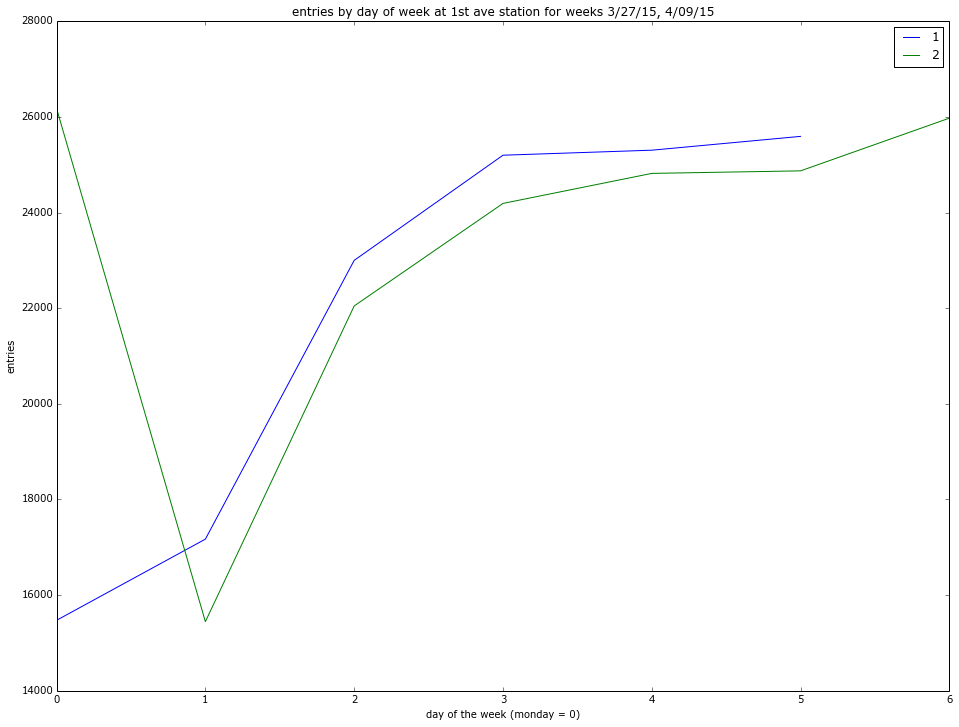

In [104]:
for key, grp in twoweeks.groupby(['weekid']):
    plt.plot(grp['ENTRIES'], label=key)
plt.legend(loc='best') 
plt.ylabel('entries')
plt.xlabel('day of the week (monday = 0)')
plt.title('entries by day of week at 1st ave station for weeks 3/27/15, 4/09/15')
plt.show()

### Challenge 9

In [41]:
stations_week = stations_total.groupby(['STATION']).sum()

In [48]:
stations_week.reset_index().sort_values(by = 'ENTRIES', ascending=[0])

,STATION,ENTRIES
61,34 ST-PENN STA,909690
229,GRD CNTRL-42 ST,828887
59,34 ST-HERALD SQ,648987
46,23 ST,642485
14,14 ST-UNION SQ,588497
109,86 ST,587194
68,42 ST-PORT AUTH,475671
222,FULTON ST,452132
113,96 ST,429248
85,59 ST,427730


In [ ]:
# for full solution, repeat 5-7, 9 for multiple stations and concat dataframes, then sort

### Challenge 10

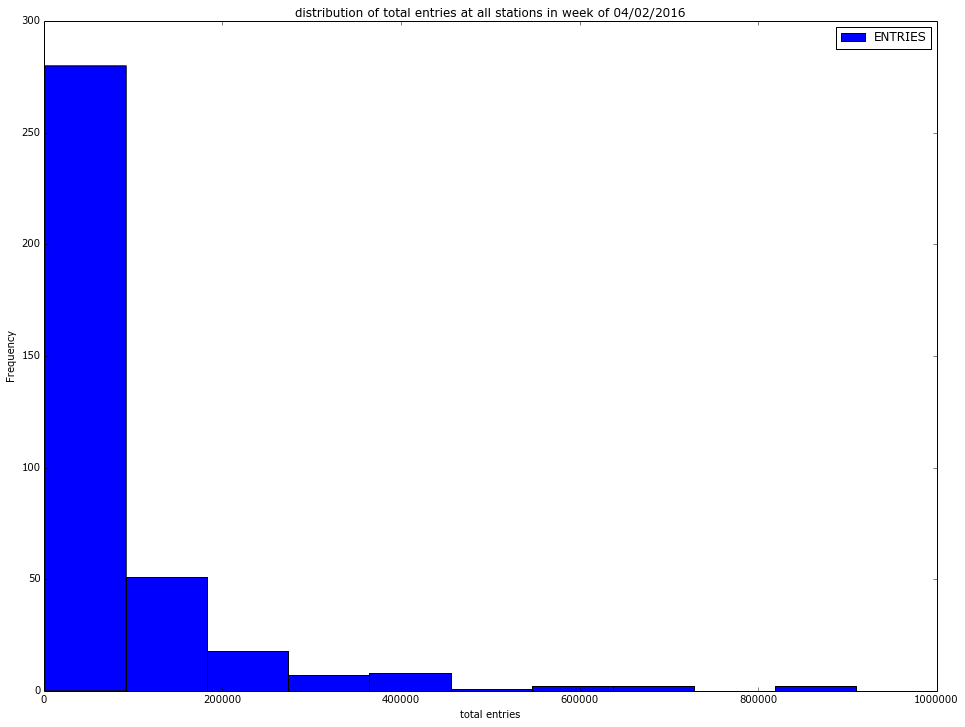

In [75]:
weektotalhist = stations_week.plot(kind='hist', title = 'distribution of total entries at all stations in week of 04/02/2016')
weektotalhist.set_xlabel("total entries")

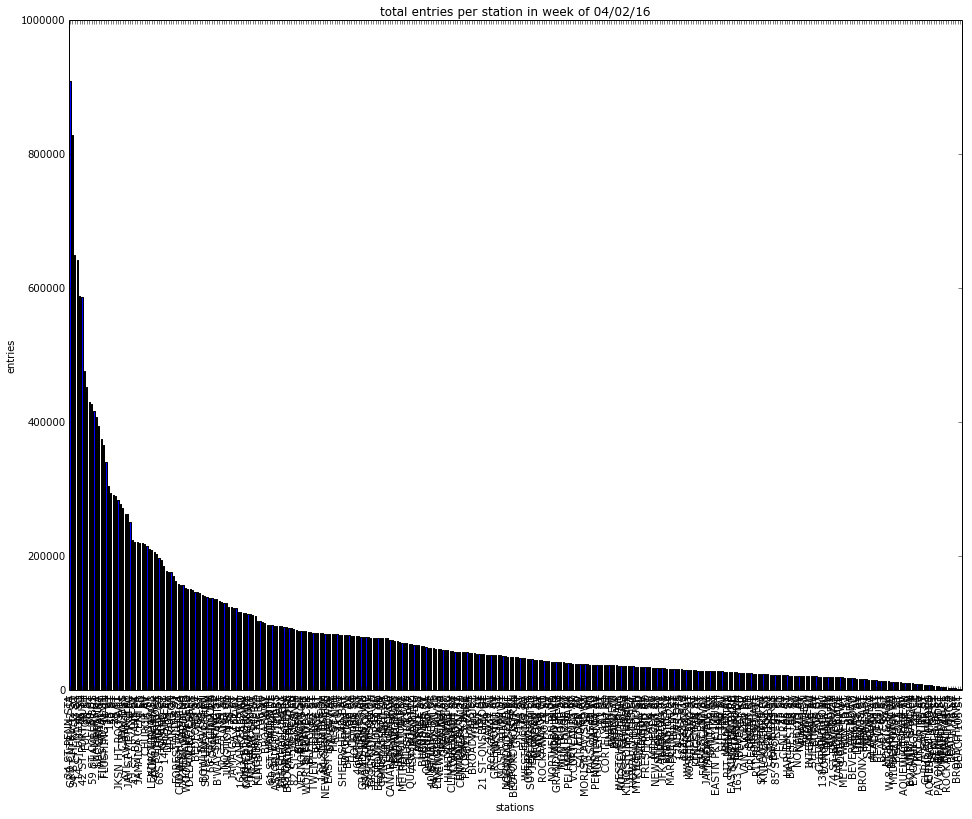

In [74]:
stations_bar = stations_week.sort_values(by ='ENTRIES',ascending=False).plot(kind='bar',legend=None,title="total entries per station in week of 04/02/16")
stations_bar.set_xlabel("stations")
stations_bar.set_ylabel("entries")


In [ ]:
#sorry about the x axis labels...